# Trabalho 3 - MO810 - Ética em Aprendizado de Máquina

In [77]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [44]:
# loading the dataset

# Credit card defaults in Taiwan
df_raw = pd.read_excel('../data/raw/default of credit card clients.xls')
df_raw.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


---
## Preprocessing data

In [45]:
# converting the first row to columns names
df = df_raw.copy()
df.columns = df.iloc[0]
df = df.drop([0])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [10]:
# Get a list of column names from the DataFrame 'df'
columns = df.columns.to_list()

# Define a list of data types to which each column should be converted
columns_types = ['object', 'int', 'category', 'category', 'category', 'int',
                 'category', 'category', 'category', 'category', 'category', 'category',
                 'int', 'int', 'int', 'int', 'int', 'int',
                 'int', 'int', 'int', 'int', 'int', 'int', 'category']

# Loop through the columns and their corresponding data types
for i in list(range(len(columns))):
    # Convert the column in the DataFrame 'df' to the specified data type
    df[columns[i]] = df[columns[i]].astype(columns_types[i])

In [39]:
# validating the columns were converted to proper types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  object  
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

---
## Data exploration

In [12]:
# basic statistics for the numerical features
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [14]:
# print statistics in markdown format for documentation purposes
print(df.describe().to_markdown())

|       |   LIMIT_BAL |        AGE |   BILL_AMT1 |   BILL_AMT2 |         BILL_AMT3 |   BILL_AMT4 |   BILL_AMT5 |   BILL_AMT6 |   PAY_AMT1 |        PAY_AMT2 |   PAY_AMT3 |   PAY_AMT4 |   PAY_AMT5 |   PAY_AMT6 |
|:------|------------:|-----------:|------------:|------------:|------------------:|------------:|------------:|------------:|-----------:|----------------:|-----------:|-----------:|-----------:|-----------:|
| count |   30000     | 30000      |    30000    |    30000    |   30000           |    30000    |     30000   |     30000   |   30000    | 30000           |   30000    |   30000    |   30000    |   30000    |
| mean  |  167484     |    35.4855 |    51223.3  |    49179.1  |   47013.2         |    43262.9  |     40311.4 |     38871.8 |    5663.58 |  5921.16        |    5225.68 |    4826.08 |    4799.39 |    5215.5  |
| std   |  129748     |     9.2179 |    73635.9  |    71173.8  |   69349.4         |    64332.9  |     60797.2 |     59554.1 |   16563.3  | 23040.9         |   

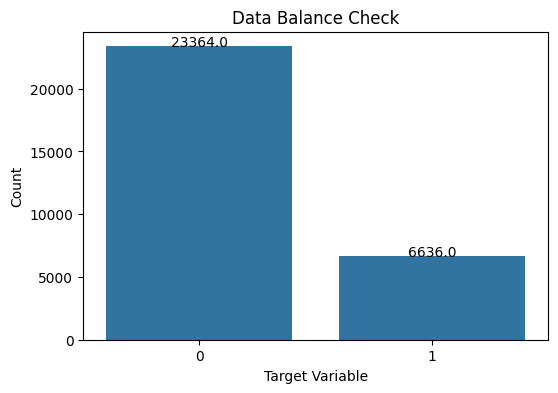

In [15]:
# checking the number of samples of each target label


# Create a new figure with a specified size of 6x4 inches
plt.figure(figsize=(6, 4))

# Create a countplot using Seaborn, with 'default payment next month' as the x-axis variable
ax = sns.countplot(x=df['default payment next month'])

# Set labels for the x-axis and y-axis
plt.xlabel('Target Variable')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Data Balance Check')

# Add count annotations above each bar in the countplot
for p in ax.patches:
    # Annotate each bar with its height (count)
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

# Display the plot
plt.show()


Considering the variables below as sensitive variables:
- LIMIT_BAL 
- SEX
- EDUCATION
- MARRIAGE
- AGE

Checking basic statistisc, distributions and correlations between the sensitive variables:

In [16]:
# sensitive variables

# Specify the variables you want to calculate descriptive statistics for
variables = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]

# Generate descriptive statistics for the specified variables
statistics = df[variables].describe()

# Print the descriptive statistics
print(statistics)

0           LIMIT_BAL           AGE
count    30000.000000  30000.000000
mean    167484.322667     35.485500
std     129747.661567      9.217904
min      10000.000000     21.000000
25%      50000.000000     28.000000
50%     140000.000000     34.000000
75%     240000.000000     41.000000
max    1000000.000000     79.000000


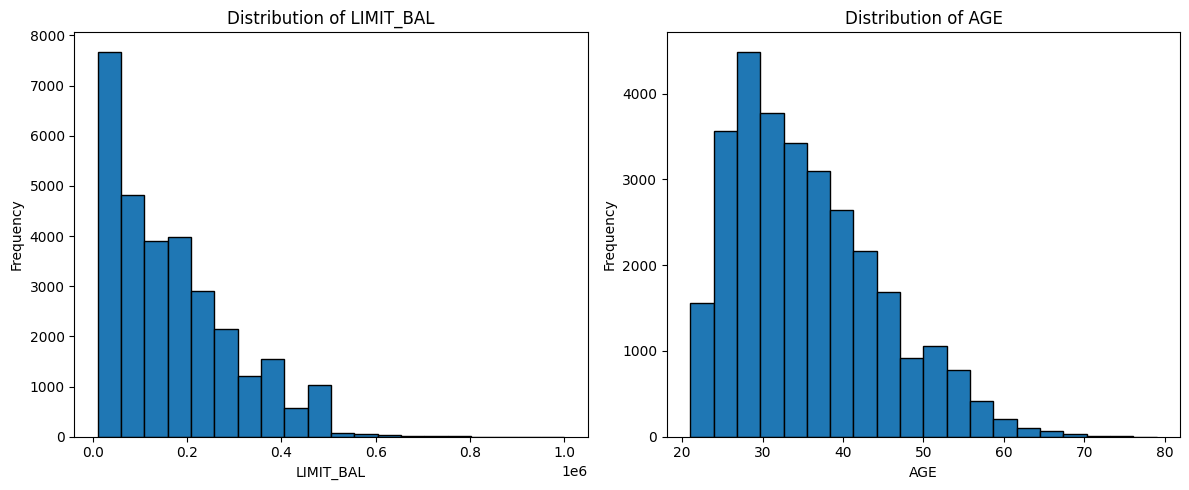

In [17]:
# Specify the variables you want to plot
variables = ["LIMIT_BAL", "AGE"]

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histograms for each variable
for i, variable in enumerate(variables):
    ax = axes[i]
    df[variable].plot(kind='hist', ax=ax, bins=20, edgecolor='k')
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

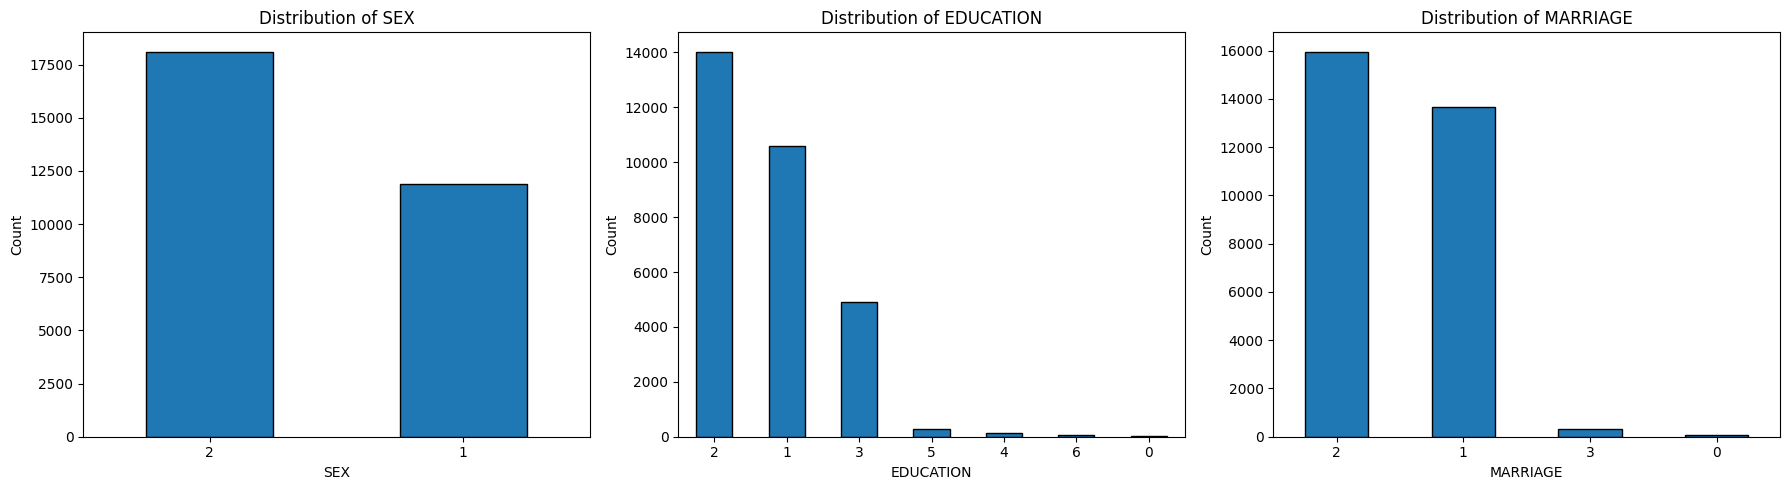

In [18]:
# Specify the categorical variables you want to analyze
categorical_variables = ["SEX", "EDUCATION", "MARRIAGE"]

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(18, 5))

# Plot bar plots for each categorical variable
for i, variable in enumerate(categorical_variables):
    ax = axes[i]
    category_counts = df[variable].value_counts()
    category_counts.plot(kind='bar', ax=ax, edgecolor='k')
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.set_xticklabels(category_counts.index, rotation=0)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

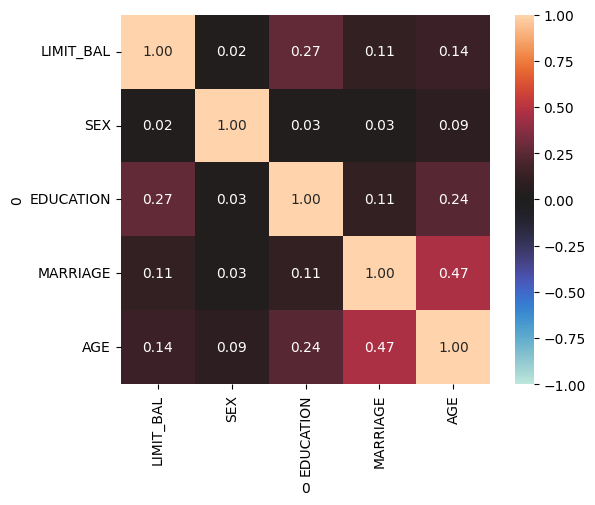

{'corr': 0          LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE
0                                                            
LIMIT_BAL   1.000000  0.024755   0.268401  0.113755  0.144713
SEX         0.024755  1.000000   0.028753  0.031629  0.090874
EDUCATION   0.268401  0.028753   1.000000  0.114005  0.236762
MARRIAGE    0.113755  0.031629   0.114005  1.000000  0.467726
AGE         0.144713  0.090874   0.236762  0.467726  1.000000, 'ax': <Axes: xlabel='0', ylabel='0'>}


In [20]:
# Specify the variables you want to include in the correlation matrix
variables = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]

# Calculate the correlation matrix using correlation_ratio
correlation_matrix = associations(df[variables])

# Print the correlation matrix
print(correlation_matrix)

In [38]:
# Calculate the associations matrix using dython.nominal.associations
associations_matrix = associations(df[list(df.columns)], compute_only=True)

### Correlation matrix for all features in the database

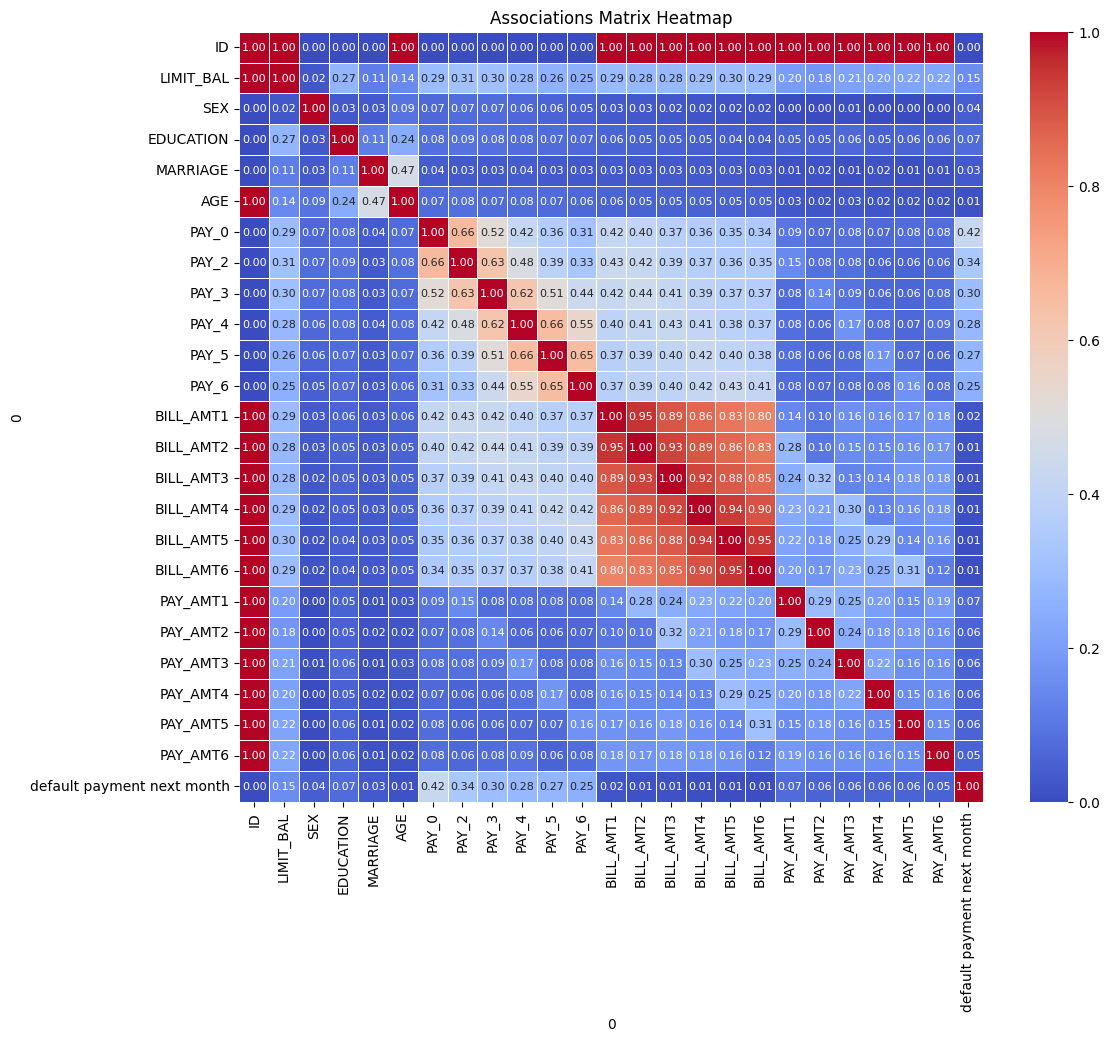

In [37]:
# Set the figure size for better presentation
plt.figure(figsize=(12, 10))

# Create a heatmap of the associations matrix with improved readability
sns.heatmap(associations_matrix['corr'], annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, annot_kws={"size": 8})

# Set the title of the plot
plt.title('Associations Matrix Heatmap')

# Display the plot
plt.show()

---
## Database preparation for modeling

In [21]:
# splitting database

# Define the proportions for the split
train_size = 0.7  # 70% for training
validation_size = 0.2  # 20% for validation
test_size = 0.1  # 10% for testing

# Split the data into the training, validation, and test sets
train_data, temp_data = train_test_split(df, test_size=(1 - train_size), random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=(test_size / (test_size + validation_size)), random_state=42)

# Print the shapes of the resulting sets to verify proportions
print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {validation_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (20999, 25)
Validation data shape: (6000, 25)
Test data shape: (3001, 25)


In [42]:
# saving preprocessed and splitted data
train_data.to_excel("../data/processed/train_data.xlsx")
validation_data.to_excel("../data/processed/validation_data.xlsx")
test_data.to_excel("../data/processed/test_data.xlsx")

In [65]:
# normalizing training dataset
numeric_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                   'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                   'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

scaled_train_data = train_data.copy()

for col in numeric_columns:
    scaled_train_data[col] = min_max_scaling(train_data[col])

---
## Trabalho 03

### Descrição

Na entrega dessa avaliação, o aluno deverá ser capaz ajustar modelos de aprendizado nos dados escolhidos no trabalho anterior (de preferência), controlar sobre e sob ajuste com o auxílio de diferentes hiperparâmetros, e utilizar diferentes métricas de desempenho para guiar o aprendizado e reportar desempenho simulado. Esta tarefa será definida nas seguintes etapas:

- Para essa tarefa,  é necessário que utilizem uma base de dados já sanitizada e integrada em etapas anteriores.
Idealmente vinculado à tarefa anterior, se não for possível, pode ser outro.

> O dataset do projeto é um arquivo de fonte única não necessitando fazer nenhuma integração de dados.
Se trata de um dataset sem aparentes inconsistências ou problemas com valores faltantes ou inconsistentes.

- Execute e explicite o processo de pré-processamento de dados executado após a preparação de dados (integração, limpeza, engenharia de features). Obs: Nesta etapa não é necessário aplicar métodos de anonimização.

> As colunas do dataset possuem nomes não relacionados com as variáveis. Os nomes adequados para as colunas estãi na primeira linha do dataset e foi necessário fazer este ajuste para que a primeira linha se tornasse a dos nomes das colunas.
> 
> Todas as veriáveis do dataset eram do tipo "object" e foi necessário converter os tipos das variáveis para tipos adequados.

In [49]:
# converting the first row to columns names
df = df_raw.copy()
df.columns = df.iloc[0]
df = df.drop([0])
display(df.head())

# converting variables types
# Get a list of column names from the DataFrame 'df'
columns = df.columns.to_list()

# Define a list of data types to which each column should be converted
columns_types = ['object', 'int', 'category', 'category', 'category', 'int',
                 'category', 'category', 'category', 'category', 'category', 'category',
                 'int', 'int', 'int', 'int', 'int', 'int',
                 'int', 'int', 'int', 'int', 'int', 'int', 'category']

# Loop through the columns and their corresponding data types
for i in list(range(len(columns))):
    # Convert the column in the DataFrame 'df' to the specified data type
    df[columns[i]] = df[columns[i]].astype(columns_types[i])

df.info()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  object  
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

- Escolha uma ou mais métricas de avaliação e justifique. Obs: Aqui você pode escolher métricas além das apresentadas em aula, até mesmo criar sua métrica.

- Escolha dois modelos simples (modelos com fronteira de decisão mais suaves, ex: fronteiras lineares e/ou quadrativas) sendo um plug-in e outro risk minimization.

In [88]:
# Define target variable and features
target_column = 'default payment next month'
X_train = scaled_train_data.drop(columns=[target_column])
X_val = validation_data.drop(columns=[target_column])
y_train = train_data[target_column]
y_val = validation_data[target_column]

In [89]:
# logistic regression

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
classification_report_output = classification_report(y_val, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report_output)

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4736
           1       0.00      0.00      0.00      1264

    accuracy                           0.79      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.62      0.79      0.70      6000



In [94]:
# decision tree classification

# in decision tree I won't use scaled training data
X_train = train_data.drop(columns=[target_column])

# Create a logistic regression model
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
classification_report_output = classification_report(y_val, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report_output)

Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      4736
           1       0.37      0.41      0.39      1264

    accuracy                           0.73      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.74      0.73      0.73      6000



- Identifique os hiperparâmetros dos modelos, faça experimentos alterando tais parâmetros e reporte o resultado.

/Users/mauriciopereiralopes/Library/Mobile Documents/com~apple~CloudDocs/git-repositories/mauricioplopes/ethical-machine-learning/ethical/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/mauriciopereiralopes/Library/Mobile Documents/com~apple~CloudDocs/git-repositories/mauricioplopes/ethical-machine-learning/ethical/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/mauriciopereiralopes/Library/Mobile Documents/com~apple~CloudDocs/git-repositories/mauricioplopes/ethical-machine-learning/ethical/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed

Best Hyperparameters: {'C': 5.623413251903491, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy with Best Model: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4736
           1       0.00      0.00      0.00      1264

    accuracy                           0.79      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.62      0.79      0.70      6000



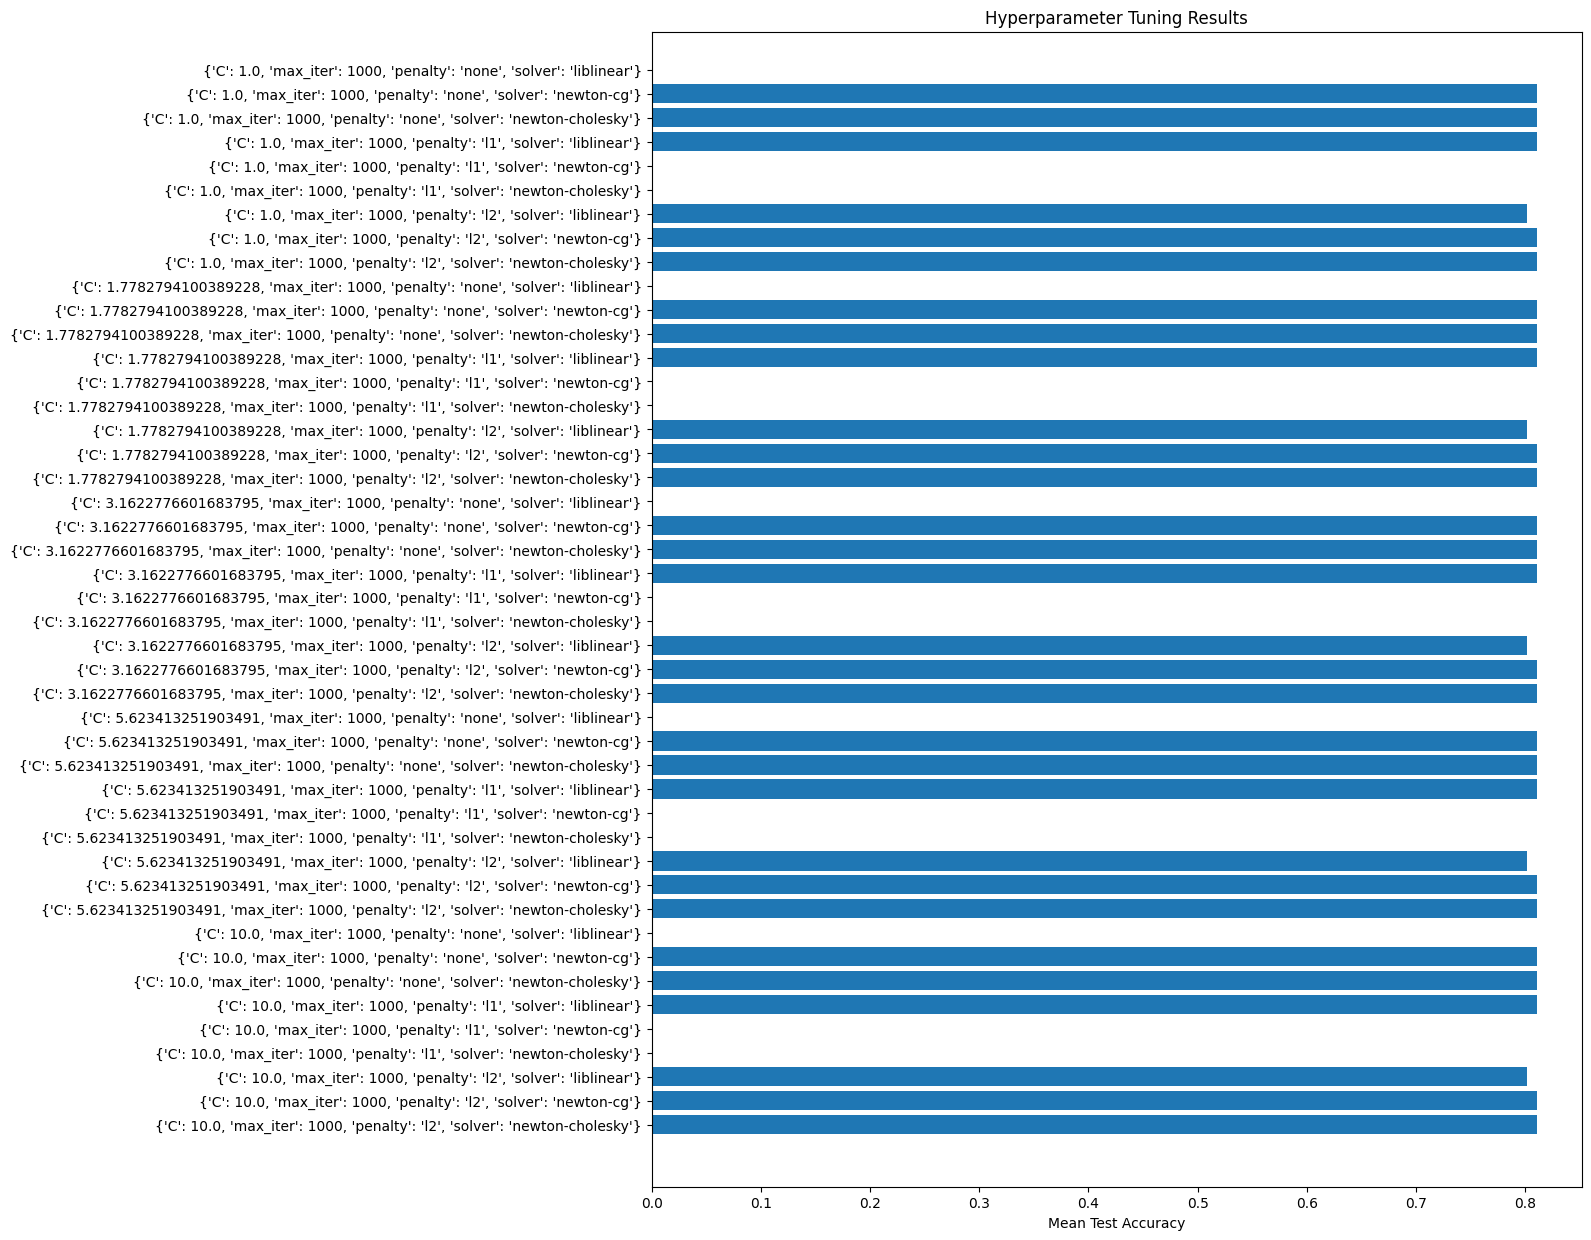

In [95]:
# Grid search for hyper parameters of Linear Regression

# in linear regression I will use scaled training data
X_train = scaled_train_data.drop(columns=[target_column])

# Define hyperparameters for grid search
param_grid = {
    'C': np.logspace(0, 1, 5),  # Regularization parameter values
    'penalty': ['none', 'l1', 'l2'],     # Penalty type (L1 or L2)
    'solver': ['liblinear', 'newton-cg', 'newton-cholesky'],      # Solver for logistic regression
    'max_iter': [1000]    # Maximum number of iterations taken for the solvers to converge
}

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_val)

# Evaluate the best model's performance
accuracy = accuracy_score(y_val, y_pred)
classification_report_output = classification_report(y_val, y_pred)

# Print the best hyperparameters and results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report_output)

# Compare different hyperparameter values with accuracy scores
results = grid_search.cv_results_
param_values = [str(params) for params in results['params']]
mean_test_scores = results['mean_test_score']

# Plot comparison of hyperparameter values and accuracy scores
plt.figure(figsize=(12, 15))
plt.barh(param_values, mean_test_scores)
plt.xlabel('Mean Test Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.gca().invert_yaxis()
plt.show()


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy with Best Model: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4736
           1       0.60      0.35      0.44      1264

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000



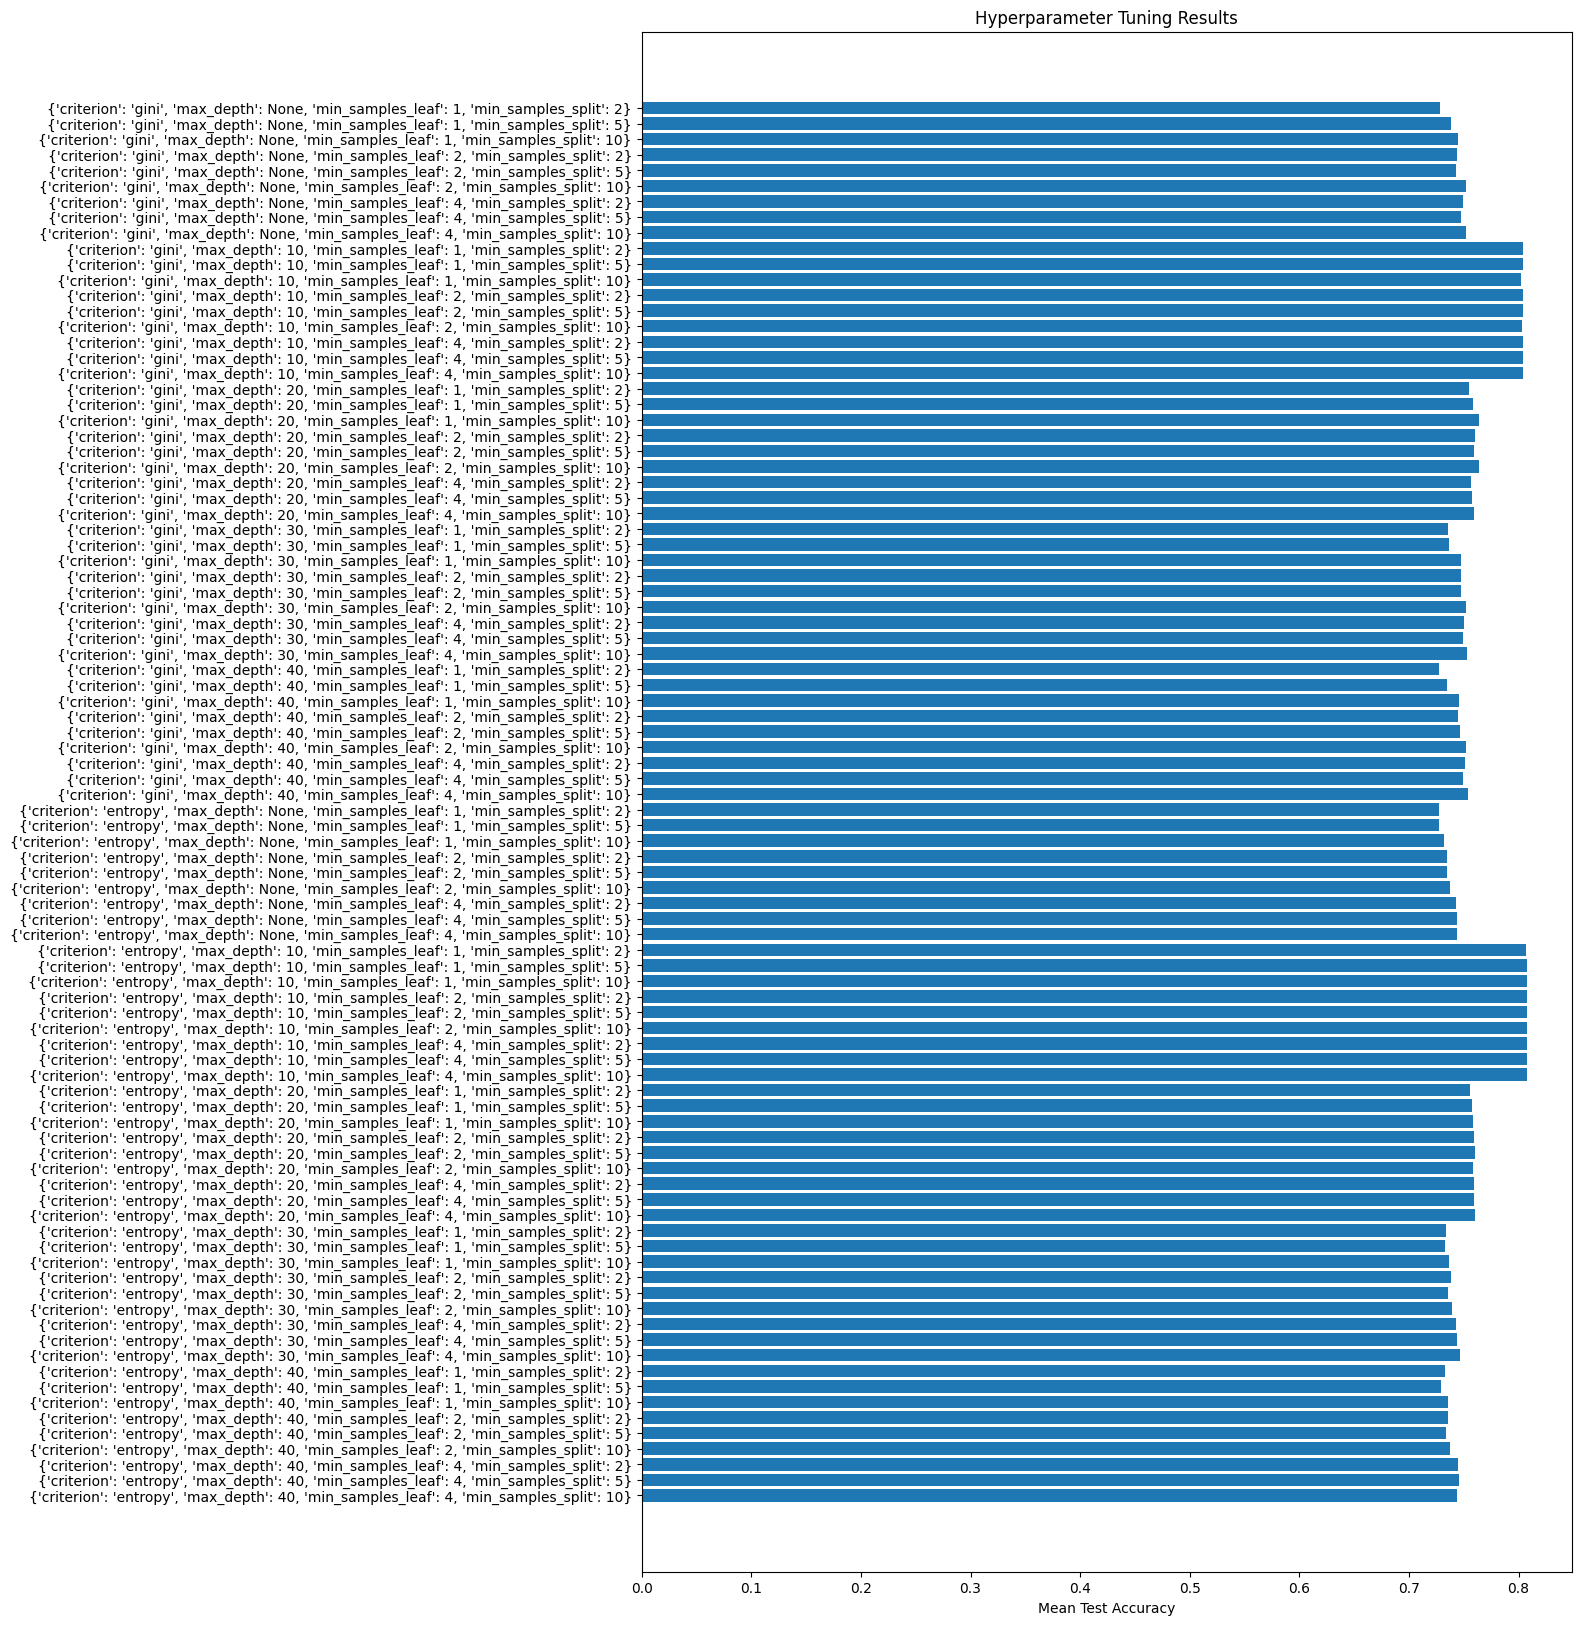

In [96]:
# Grid search for hyper parameters of Decision Tree Classifier

# in decision tree I won't use scaled training data
X_train = train_data.drop(columns=[target_column])

# Define hyperparameters for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],            # Split criterion
    'max_depth': [None, 10, 20, 30, 40],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]               # Minimum samples required at leaf nodes
}

# Create a Decision Tree Classifier model
decision_tree = DecisionTreeClassifier()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_val)

# Evaluate the best model's performance
accuracy = accuracy_score(y_val, y_pred)
classification_report_output = classification_report(y_val, y_pred)

# Print the best hyperparameters and results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report_output)

# Compare different hyperparameter values with accuracy scores
results = grid_search.cv_results_
param_values = [str(params) for params in results['params']]
mean_test_scores = results['mean_test_score']

# Plot comparison of hyperparameter values and accuracy scores
plt.figure(figsize=(12, 20))
plt.barh(param_values, mean_test_scores)
plt.xlabel('Mean Test Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.gca().invert_yaxis()
plt.show()


- Escolha dois modelos complexos (modelos com fronteira de decisão menos suaves – variaçães mais intensas) sendo um plug-in e outro risk minimization.

- Identifique os hiperparâmetros dos modelos, faça experimentos alterando tais parâmetros e reporte o resultado em termos da(s) métrica(s) escolhida(s).

- Compare os quatro modelos.

- Escolha um novo modelo, e ajuste seus hiperparâmetros. Escolha a importância dada a falsos negativos e falso positivos para o seu problema, implemente uma tomada de decisão com risco bayesiano, implemente o risco padrão (0.5) e o risco que iguale as proporções das classes nos dados reais e preditos (neste caso observe as proporçães de cada classe dentre as amostras e a predição e mude o threshold até que a proporção seja próxima).

- Faça uma calibração (capítulo 6.3 do livro) para algum dos modelos, estude seu impacto e compare com as formas de tomada de decisão.

- Escolha um modelo principal e faça um model card sobre ele (uma página adicional que não conta nas 4 do relatório).

In [74]:
np.linspace(-3, 3, 5)

array([-3. , -1.5,  0. ,  1.5,  3. ])